# Bi-dimensional Discrete Cosine Transform
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [2D_discrete_cosine_transform.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Computer-Vision-Fundamentals/2D_discrete_cosine_transform.ipynb)
---
Overview and implementation of bi-dimensional discrete space cosine transform.

$O(n²)$ >> *The running time is going to be quite long*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import imageio

from _utils import *

In [2]:
image = imageio.imread('../_data/cameraman.png')
s = 4; image = image[::s, ::s]/255
N1, N2 = image.shape

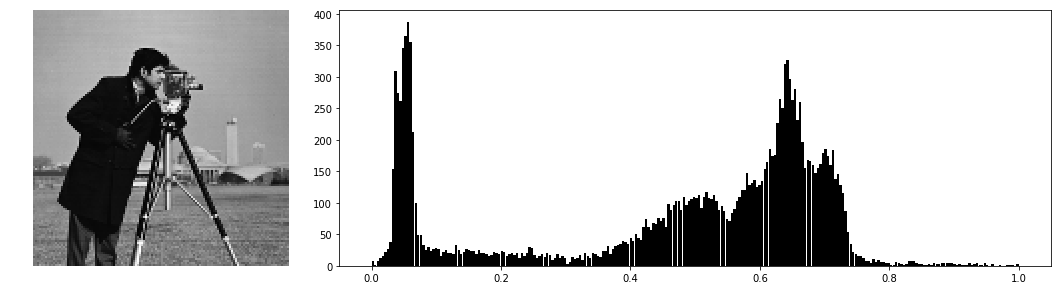

In [3]:
histogram(image, interval=[0, 1])

## 1. Discrete space Cosine transform
---
Transforming from spatial to frequency domain using *Discrete Cosine Transform*, defined by:

$$ \large
X(\omega_1,\omega_2)=\lambda(\omega_1)\lambda(\omega_2)\sum_{n_1=0}^{N_1-1}\sum_{n_2=0}^{N_2-1}x(n_1,n_2) \cos\left(\pi\omega_1\frac{2 n_1+1}{2 N1}\right) \cos\left(\pi\omega_2\frac{2 n_2+1}{2 N2}\right)
$$

where:

$$ \large
\lambda(\omega)=
\begin{cases}
\sqrt{\frac{1}{N}}, \text{ if } \omega=0\\
\sqrt{\frac{2}{N}}, \text{ otherwise}
\end{cases}
$$

In [4]:
def DCT2D(x):
    '''
    Discrete space cosine transform
    x: Input matrix
    '''
    N1, N2 = x.shape
    X = np.zeros((N1, N2))
    n1, n2 = np.mgrid[0:N1, 0:N2]
    for w1 in range(N1):
        for w2 in range(N2):
            l1 = (2/N1)**0.5 if w1 else (1/N1)**0.5
            l2 = (2/N2)**0.5 if w2 else (1/N2)**0.5
            cos1 = np.cos(np.pi*w1*(2*n1 + 1)/(2*N1))
            cos2 = np.cos(np.pi*w2*(2*n2 + 1)/(2*N2))
            X[w1, w2] = l1*l2*np.sum(x*cos1*cos2)
    return X

In [5]:
%%time
IMAGE = DCT2D(image)

CPU times: user 1min 10s, sys: 3.05 s, total: 1min 13s
Wall time: 25.8 s


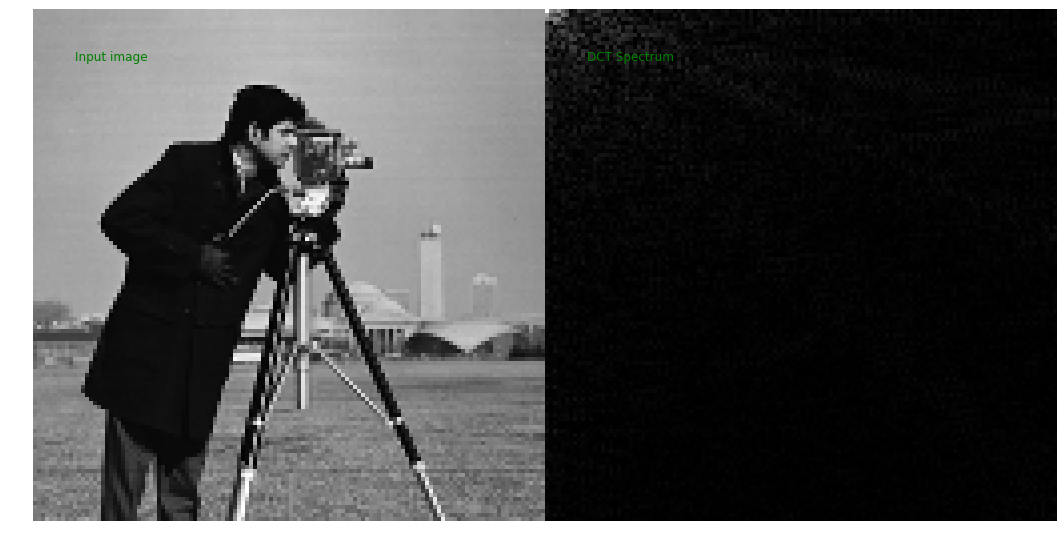

In [6]:
xX = np.array([image, np.log10(1 + abs(IMAGE))])
panel(xX, [2, 1], text_color='green',
      texts=['Input image', 'DCT Spectrum'])

## 2. Inverse discrete space Cosine transform
---
Transforming from frequency to spatial domain using *Inverse Discrete Cosine Transform*, defined by:

$$ \large
X(n_1,n_2)=\sum_{k_1=0}^{N_1-1}\sum_{k_2=0}^{N_2-1}\lambda(k_1)\lambda(k_2)x(k_1,k_2) \cos\left(\pi k_1\frac{2 n_1+1}{2 N1}\right) \cos\left(\pi k_2\frac{2 n_2+1}{2 N2}\right)
$$

In [7]:
def iDCT2D(X, shift=True):
    '''
    Inverse discrete space cosine transform
    X: Input spectrum matrix
    '''
    N1, N2 = X.shape
    x = np.zeros((N1, N2))
    k1, k2 = np.mgrid[0:N1, 0:N2]
    l1 = np.ones((N1, N2))*(2/N1)**0.5
    l2 = np.ones((N1, N2))*(2/N2)**0.5
    l1[0] = (1/N1)**0.5; l2[:,0] = (1/N2)**0.5
    for n1 in range(N1):
        for n2 in range(N2):
            cos1 = np.cos(np.pi*k1*(2*n1 + 1)/(2*N1))
            cos2 = np.cos(np.pi*k2*(2*n2 + 1)/(2*N2))
            x[n1, n2] = np.sum(l1*l2*X*cos1*cos2)
    return x

In [8]:
%%time
image_ = iDCT2D(IMAGE)

CPU times: user 1min 1s, sys: 2.59 s, total: 1min 3s
Wall time: 22.2 s


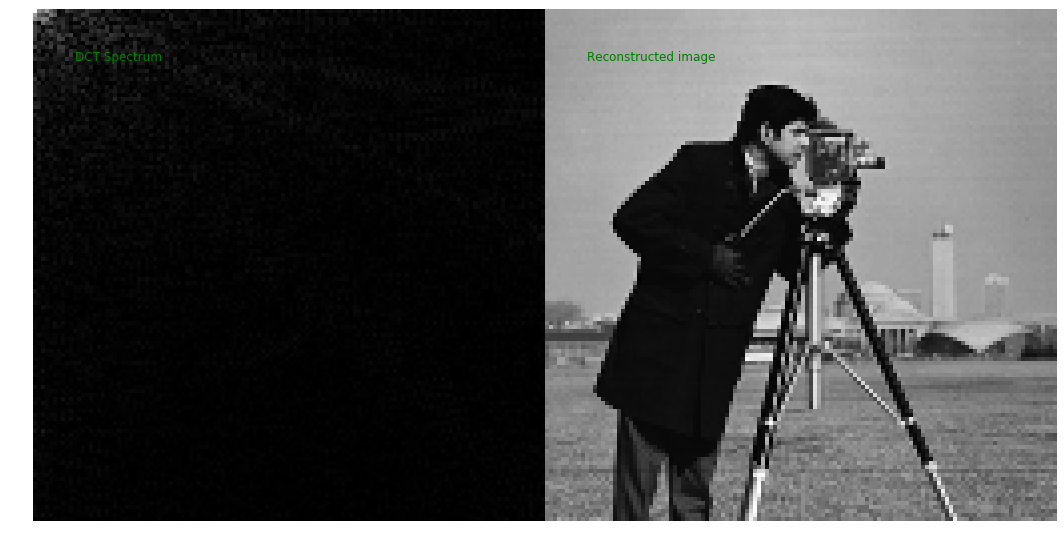

In [9]:
Xx_ = np.array([np.log10(1 + abs(IMAGE)), image_])
panel(Xx_, [2, 1], text_color='green',
      texts=['DCT Spectrum', 'Reconstructed image'])

## 3. DCT Spectrum Filtering
---
In spite of *DCT* be mostly used for image compression, let's take a look at how it seems when we apply some filter on the *DCT spectrum*.

$$ \large
F(u,v)=H(u,v)X(u,v)
$$

e.g.: Given the spatial-frequency filter $H$ as:

$$ \large
H(r,\theta)=e^{-\beta r^2}\left[\frac{cos(\gamma\theta)}{2}+\frac{1}{2}\right]
$$

In [10]:
N1, N2 = image.shape
u, v = np.mgrid[0:N1, 0:N2]/max(N1, N2)

r = (u**2 + v**2)**0.5; theta = np.arctan2(v, u)
H = np.exp(-3*r**2)*(np.cos(4*2*theta)/2 + 1/2)

In [11]:
%%time
image__ = iDCT2D(H*IMAGE)

CPU times: user 1min 3s, sys: 2.76 s, total: 1min 6s
Wall time: 24 s


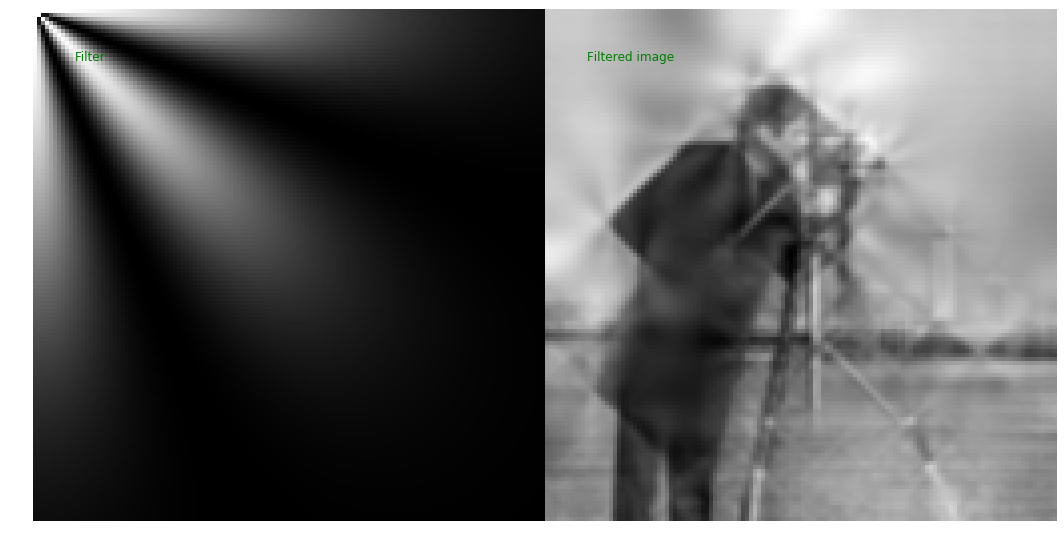

In [12]:
Hx__ = np.array([H, abs(image__*0.5 + 0.5)])
panel(Hx__, (2, 1), text_color='green',
      texts=['Filter', 'Filtered image'])